# Основы анализа данных в Python

*Алла Тамбовцева*

## Практикум по линейной регрессии: часть 1

### Подготовка к работе

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns

Зафиксируем настройки графиков `seaborn` – стиль и размер изображений:

In [2]:
sns.set(style = "whitegrid", rc = {'figure.figsize': (16, 9)}) 

Загрузим данные из знакомого файла `c.xlsx` по видеоиграм:

In [3]:
games = pd.read_excel("c.xlsx")
games.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Удалим ненужные столбцы и сохраним изменения:

In [4]:
games.drop(columns = ["Unnamed: 0", "Critic_Count", "User_Count"], inplace = True)

## Часть 1: визуализация связей

Построим корреляционную матрицу:

In [5]:
# numeric_only = True для новых версий

games.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000


Визуализируем корреляционную матрицу – построим тепловую карту (*heatmap*):

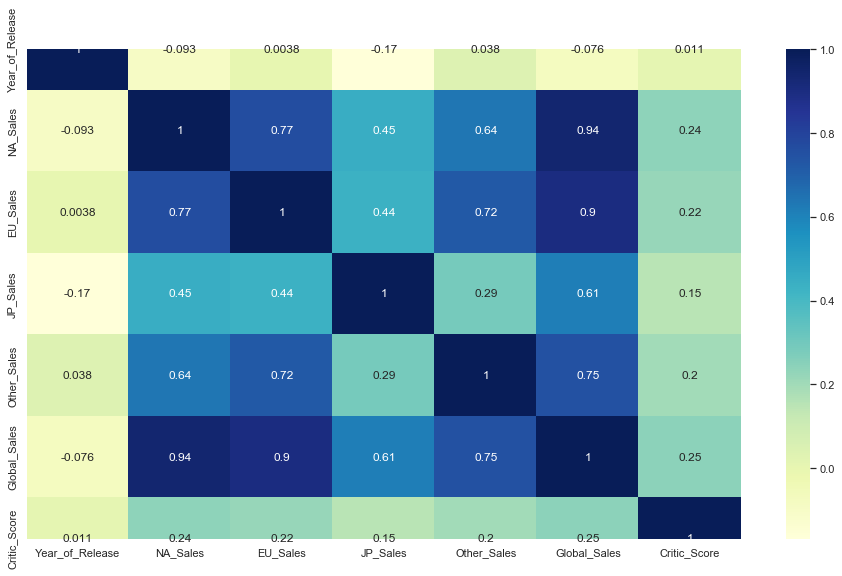

In [6]:
# cmap: color map, цветовая палитра, варианты: 
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
# annot = True: включаем подписи самих коэффициентов Пирсона

sns.heatmap(games.corr(), cmap="YlGnBu", annot = True);

Сфокусируемся на конкретных переменных, `Global_Sales` и `NA_Sales`, и построим диаграмму рассеивания с наложенной на нее регрессионной прямой (парная линейная регрессия):

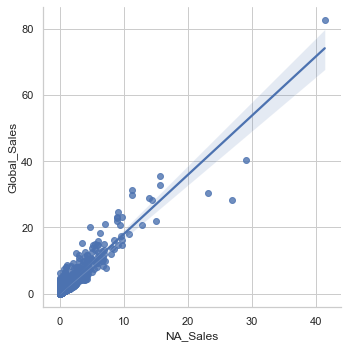

In [7]:
sns.lmplot(data = games, x="NA_Sales", y="Global_Sales");

Избавимся от не совсем типичного наблюдения:

In [8]:
games_upd = games[games["NA_Sales"] < 40]

Перестроим график:

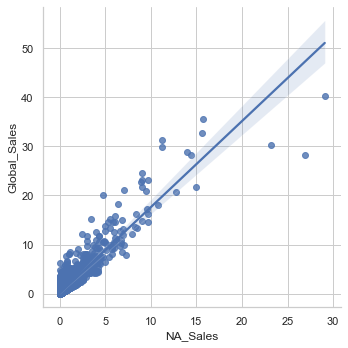

In [9]:
sns.lmplot(data = games_upd, x="NA_Sales", y="Global_Sales");

Попробуем другую модель:

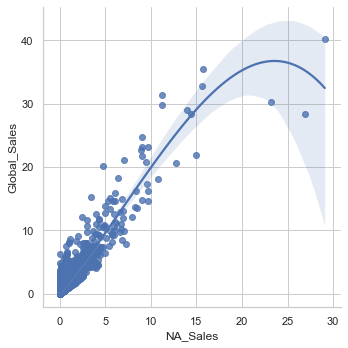

In [10]:
# order=3: полиномиальная модель степени 3
# в нее включена константа, NA_Sales, 
# NA_Sales в степени 2 и NA_Sales в степени 3

sns.lmplot(data = games_upd, x="NA_Sales", y="Global_Sales", order = 3);

## Часть 2: парная и множественная линейная регрессия, вся выборка является обучающей

Импортируем необходимые функции:

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Задача 1 (из демоверсии независимого экзамена)

Оцените линейную регрессию, уравнение которой имеет следующий вид:

$$
\widehat{\text{Global_Sales}}_i=\hat{\omega}_0+\hat{\omega}_1 * \text{NA_Sales}_i,
$$

где нижние индексы обозначают значения соответствующих переменных для наблюдения $i$.

В ответ выпишите оценку коэффициента при свободном члене.

Пример ответа:  0.06

In [12]:
# создаем объект класса LinearRegression
# по умолчанию реализует OLS модель

lm = LinearRegression()

In [13]:
Y = games["Global_Sales"]
X = games[["NA_Sales"]]

model01 = lm.fit(X, Y)
print(model01.intercept_) # ответ 0.06
print(model01.coef_)

0.06204106257017372
[1.79053279]


### Задача 2 (из демоверсии независимого экзамена)

Оцените линейную регрессию, уравнение которой имеет следующий вид:

$$
\widehat{\text{Global_Sales}}_i=\hat{\omega}_0+\hat{\omega}_1 * \text{NA_Sales}_i,
$$

где нижние индексы обозначают значения соответствующих переменных для наблюдения $i$.

В ответ выпишите значение среднеквадратичной ошибки (MSE) на обучающей выборке.

Пример ответа: 12.00

In [14]:
Y_pred = model01.predict(X)

print("MSE:", mean_squared_error(Y, Y_pred)) # ответ 0.27
print("MAE:", mean_absolute_error(Y, Y_pred))
print("R2:", r2_score(Y, Y_pred))

MSE: 0.2743356033079392
MAE: 0.19745859404243862
R2: 0.8855007503060843


### Задача 3 (из тренировочной версии независимого экзамена)

Оцените линейную регрессию, уравнение которой имеет следующий вид:

$$
\widehat{\text{Other_Sales}}_i=\hat{\omega}_0+\hat{\omega}_1 * \text{NA_Sales}_i + \hat{\omega}_2 * \text{JP_Sales}_i,
$$

где нижние индексы обозначают значения соответствующих переменных для наблюдения $i$.

В ответ выпишите оценку коэффициента при свободном члене.

Пример ответа:  0.06

In [15]:
Y = games["Other_Sales"]
X = games[["NA_Sales", "JP_Sales"]]

model02 = lm.fit(X, Y)
print(model02.intercept_) # ответ 0.01
print(model02.coef_)

0.008635460765911776
[0.1460658 0.0029994]


### Задача 4 (из тренировочной версии независимого экзамена)

Оцените линейную регрессию, уравнение которой имеет следующий вид:

$$
\widehat{\text{Other_Sales}}_i=\hat{\omega}_0+\hat{\omega}_1 * \text{NA_Sales}_i + \hat{\omega}_2 * \text{JP_Sales}_i,
$$

где нижние индексы обозначают значения соответствующих переменных для наблюдения $i$.

В ответ выпишите значение MAE (средней абсолютной ошибки) на обучающей выборке.

Пример ответа:  0.06

In [16]:
Y_pred2 = model02.predict(X)

print("MSE:", mean_squared_error(Y, Y_pred2)) 
print("MAE:", mean_absolute_error(Y, Y_pred2)) # ответ 0.04
print("R2:", r2_score(Y, Y_pred2)) 

MSE: 0.02063977350506148
MAE: 0.03508696969377178
R2: 0.4078984126724643


## Часть 3: множественная линейная регрессия, деление на обучающую и тестовую выборку

Импортируем необходимые функции:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Линейная модель

Создаем объект класса `LinearRegression`:

In [18]:
lm = LinearRegression()

Выбираем столбцы:

In [19]:
X = games[["NA_Sales", "JP_Sales"]]
Y = games["Global_Sales"]

Разбиваем данные на обучающую и тестовую выборки:

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

Обучаем линейную модель:

In [21]:
model_ols = lm.fit(X_train, Y_train)

Оцениваем ее качество:

In [22]:
print(model_ols.score(X_train, Y_train))
print(model_ols.score(X_test, Y_test))

0.9375773989782563
0.8934811921779167


### Полиномиальная модель

Импортируем необходимую функцию:

In [23]:
from sklearn.preprocessing import PolynomialFeatures

Преобразуем исходные данные (многочлен третьей степени – вспомните график в начале):

In [24]:
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

Обучаем модель:

In [25]:
model_poly = lm.fit(X_train_poly, Y_train)

Проверяем качество:

In [26]:
print(model_poly.score(X_train_poly, Y_train))
print(model_poly.score(X_test_poly, Y_test))

0.950115432784038
0.8550552695342691
